# Nama : Barzan Trio Putra

# Nim    : 09011381722144

# Kelas : SK5U

## EEG EYE STATE

EEG Eye State sangat penting dan berguna untuk mendeteksi keadaan kognisi manusia. Penelitian sebelumnya telah memvalidasi kelayakan pembelajaran mesin dan pendekatan statistik untuk klasifikasi mata negara EEG.

## Dataset

### - Informasi Dataset

Semua data berasal dari satu pengukuran EEG berkelanjutan dengan Neuroheadset Emotiv EEG. Durasi pengukuran adalah 117 detik. Keadaan mata terdeteksi melalui kamera selama pengukuran EEG dan ditambahkan kemudian secara manual ke file setelah menganalisis bingkai video. '1' menunjukkan mata tertutup dan '0' keadaan mata terbuka. Semua nilai berada dalam urutan kronologis dengan nilai pengukuran pertama di bagian atas data.

 Dataset dapat didownload pada -> https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State#

# Mengimport library yang diperlukan
- numpy = Digunakan Untuk Menginput Array
- pandas = Fungsinya Seperti Numpy, Namun Lebih Kearah Matriks Dengan Baris Dan Kolom Yang Telah Dimuat Dalam Bentuk Tabel
- sklearn.preprocessing = digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif diproses dalam jaringan saraf
- matplotlib.pyplot = Digunakan Untuk Membuat Grafik Dataset Yang Telah Valid
- sklearn.Model_Selection = Digunakan Untuk Memilah Dataset Menjadi Data Training, Data Testing Dan Data Aslinya
- keras.optimizers = Digunakan Untuk Mengoptimalkan Data Dengan Fungsi Adam
- keras.Model = Digunakan Untuk Memasukkan Hidden Layers (Banyaknya Jalan Pada 1 Data Ke Data Yang Lain) Dengan Sequential
- keras.Layers = Digunakan Untuk Banyaknya Hidden Layers Yang Digunakan Untuk 1 Data Set (Banyaknya Cara/Jalan)
- keras.activations = Digunakan Untuk Mengubah Setiap Nilai Input Negatif Menjadi 0 Pada Grafik Sesegera 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu

Using TensorFlow backend.


mengimport dataset "EEG Eye State.csv". dataset yang berformat csv tersebut kemudian di ubah menjadi format numpy kedalam variabel dataset

# import Dataset

In [2]:
dataset = np.loadtxt('EEG Eye State.csv', delimiter=',', dtype=float)

In [3]:
dataset

array([[2.00000e+01, 4.32923e+03, 4.00923e+03, ..., 4.63590e+03,
        4.39385e+03, 0.00000e+00],
       [2.10000e+01, 4.32462e+03, 4.00462e+03, ..., 4.63282e+03,
        4.38410e+03, 0.00000e+00],
       [2.20000e+01, 4.32769e+03, 4.00667e+03, ..., 4.62872e+03,
        4.38923e+03, 0.00000e+00],
       ...,
       [1.49970e+04, 4.27744e+03, 3.99077e+03, ..., 4.59179e+03,
        4.33949e+03, 1.00000e+00],
       [1.49980e+04, 4.28462e+03, 3.99179e+03, ..., 4.59641e+03,
        4.35077e+03, 1.00000e+00],
       [1.49990e+04, 4.28769e+03, 3.99744e+03, ..., 4.59795e+03,
        4.35077e+03, 1.00000e+00]])

# Menentukan Features dan Labels

In [4]:
features = dataset[:, 0:15]
labels = dataset [:, 15]

In [5]:
print(features)

[[   20.    4329.23  4009.23 ...  4280.51  4635.9   4393.85]
 [   21.    4324.62  4004.62 ...  4279.49  4632.82  4384.1 ]
 [   22.    4327.69  4006.67 ...  4282.05  4628.72  4389.23]
 ...
 [14997.    4277.44  3990.77 ...  4257.95  4591.79  4339.49]
 [14998.    4284.62  3991.79 ...  4267.18  4596.41  4350.77]
 [14999.    4287.69  3997.44 ...  4274.36  4597.95  4350.77]]


In [6]:
print(labels)

[0. 0. 0. ... 1. 1. 1.]


# Normalisasi

disini kita menggunakan metode Normalisasi yaitu MinMaxScaler

In [7]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# Splitting dan Modelling

disini kita membuat file test berukuran 20 % dari jumlah keseluruhan data yang tersedia. kemudian kita membuat model NN, yang pertama memiliki 100 hiden layer yang kedua memiliki 50 layer yang ketiga memiliki 50 layer. selain itu kita membuat output layer 1 (ya atau tidak)

In [8]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [9]:
model = Sequential()
model.add(Dense(units= 100, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Setalah itu kita lakukan fit model. Pada tahap ini dilakukan proses untuk mendapatkan akurasi dan loss dari dataset.

In [10]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=32, epochs=200)
acc_testing  = model.evaluate(testing_data, testing_label) 


Train on 11984 samples, validate on 2996 samples
Epoch 1/200
11984/11984 [==============================] - 8s 678us/step - loss: 0.6463 - accuracy: 0.6071 - val_loss: 0.6181 - val_accuracy: 0.6485
Epoch 2/200
11984/11984 [==============================] - 4s 302us/step - loss: 0.6222 - accuracy: 0.6446 - val_loss: 0.6046 - val_accuracy: 0.6525
Epoch 3/200
11984/11984 [==============================] - 4s 327us/step - loss: 0.6139 - accuracy: 0.6454 - val_loss: 0.5958 - val_accuracy: 0.6605
Epoch 4/200
11984/11984 [==============================] - 4s 304us/step - loss: 0.6071 - accuracy: 0.6481 - val_loss: 0.5887 - val_accuracy: 0.6916
Epoch 5/200
11984/11984 [==============================] - 4s 323us/step - loss: 0.5952 - accuracy: 0.6504 - val_loss: 0.5776 - val_accuracy: 0.6502
Epoch 6/200
11984/11984 [==============================] - 4s 322us/step - loss: 0.5819 - accuracy: 0.6593 - val_loss: 0.5561 - val_accuracy: 0.6939
Epoch 7/200
11984/11984 [==============================]

Epoch 54/200
11984/11984 [==============================] - 3s 291us/step - loss: 0.3675 - accuracy: 0.8097 - val_loss: 0.3176 - val_accuracy: 0.8551
Epoch 55/200
11984/11984 [==============================] - 4s 296us/step - loss: 0.3724 - accuracy: 0.8049 - val_loss: 0.3361 - val_accuracy: 0.8521
Epoch 56/200
11984/11984 [==============================] - 6s 506us/step - loss: 0.3676 - accuracy: 0.8123 - val_loss: 0.3215 - val_accuracy: 0.8531
Epoch 57/200
11984/11984 [==============================] - 15s 1ms/step - loss: 0.3671 - accuracy: 0.8148 - val_loss: 0.3157 - val_accuracy: 0.8555
Epoch 58/200
11984/11984 [==============================] - 13s 1ms/step - loss: 0.3677 - accuracy: 0.8123 - val_loss: 0.3220 - val_accuracy: 0.8501
Epoch 59/200
11984/11984 [==============================] - 11s 934us/step - loss: 0.3693 - accuracy: 0.8134 - val_loss: 0.3449 - val_accuracy: 0.8698
Epoch 60/200
11984/11984 [==============================] - 11s 901us/step - loss: 0.3606 - accuracy:

11984/11984 [==============================] - 6s 528us/step - loss: 0.3305 - accuracy: 0.8520 - val_loss: 0.2812 - val_accuracy: 0.8879
Epoch 109/200
11984/11984 [==============================] - 6s 507us/step - loss: 0.3372 - accuracy: 0.8460 - val_loss: 0.2873 - val_accuracy: 0.8808
Epoch 110/200
11984/11984 [==============================] - 6s 511us/step - loss: 0.3292 - accuracy: 0.8480 - val_loss: 0.2829 - val_accuracy: 0.8992
Epoch 111/200
11984/11984 [==============================] - 6s 524us/step - loss: 0.3382 - accuracy: 0.8429 - val_loss: 0.3573 - val_accuracy: 0.8585
Epoch 112/200
11984/11984 [==============================] - 7s 560us/step - loss: 0.3228 - accuracy: 0.8521 - val_loss: 0.2783 - val_accuracy: 0.8788
Epoch 113/200
11984/11984 [==============================] - 6s 534us/step - loss: 0.3369 - accuracy: 0.8475 - val_loss: 0.3009 - val_accuracy: 0.8858
Epoch 114/200
11984/11984 [==============================] - 8s 637us/step - loss: 0.3276 - accuracy: 0.8516

11984/11984 [==============================] - 3s 246us/step - loss: 0.2599 - accuracy: 0.9026 - val_loss: 0.1932 - val_accuracy: 0.9409
Epoch 163/200
11984/11984 [==============================] - 3s 246us/step - loss: 0.2559 - accuracy: 0.9047 - val_loss: 0.2576 - val_accuracy: 0.9296
Epoch 164/200
11984/11984 [==============================] - 3s 267us/step - loss: 0.2560 - accuracy: 0.9008 - val_loss: 0.2316 - val_accuracy: 0.9302
Epoch 165/200
11984/11984 [==============================] - 3s 248us/step - loss: 0.2504 - accuracy: 0.9081 - val_loss: 0.2173 - val_accuracy: 0.9299
Epoch 166/200
11984/11984 [==============================] - 3s 248us/step - loss: 0.2644 - accuracy: 0.9035 - val_loss: 0.1817 - val_accuracy: 0.9409
Epoch 167/200
11984/11984 [==============================] - 3s 250us/step - loss: 0.2482 - accuracy: 0.9096 - val_loss: 0.2002 - val_accuracy: 0.9276
Epoch 168/200
11984/11984 [==============================] - 3s 250us/step - loss: 0.2416 - accuracy: 0.9100

Setelah data di training, kemudian data dapat dievaluasi melalui proses evaluasi model dan hasil dari akurasi akan dapat ditampilkan. Pada tahap ini akurasi yang saya dapatkan adalah sebesar 93%.

In [11]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.9335781335830688


In [12]:
acc_training.history

{'val_loss': [0.6181077285506856,
  0.6046195541905147,
  0.595799505233128,
  0.5886975732919212,
  0.5776226535658333,
  0.5560983259464616,
  0.5411818847159677,
  0.5285942374625416,
  0.5200397208313121,
  0.5304631539116873,
  0.5192368127634432,
  0.5222071067035915,
  0.544187528030258,
  0.5173486545980375,
  0.4967214977629831,
  0.4930739655832105,
  0.4948548536116036,
  0.4867309541186599,
  0.48087383613726487,
  0.4751577802271009,
  0.4649158871380764,
  0.428061799786597,
  0.42490526604079437,
  0.4208894902380191,
  0.44327744968901966,
  0.40375344652200096,
  0.47509920143476314,
  0.4036450243601016,
  0.3965709085696848,
  0.39107539458013824,
  0.37602464757233023,
  0.38542299857922646,
  0.3645884477407815,
  0.36196224771449975,
  0.3917142100264138,
  0.39929950726684804,
  0.3891070762845639,
  0.37169128544976776,
  0.3481486775528127,
  0.3611774542462205,
  0.3454446428926669,
  0.3451527468511991,
  0.3552467881121209,
  0.35938034523949924,
  0.3340581

# Plotting Model Akurasi dan Loss Akurasi

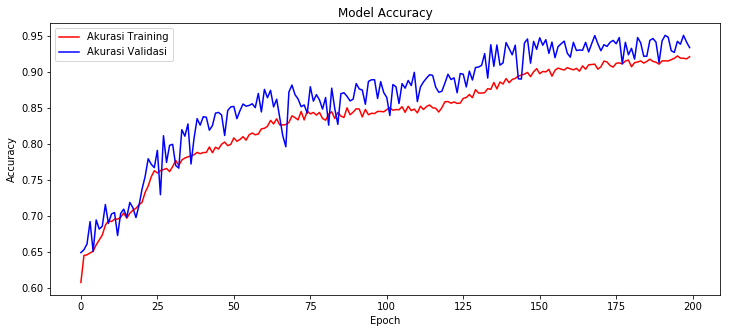

In [13]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

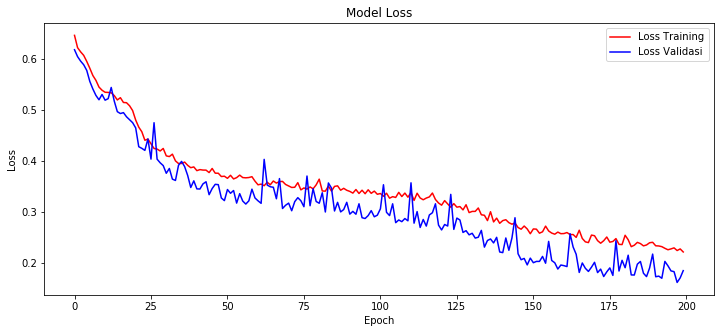

In [14]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [15]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [16]:
training_predicted.round()

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

# Matriks Confusion
Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. Rumus ini melakukan perhitungan dengan 4 keluaran, yaitu: recall, precision, acuraccy dan error rate.

Confusion Matriks memiliki 4 instilah yaitu

    -True Positif
    -False Positif
    -False Negative
    -True Negativ
    
    
1. True Positives (TP): True positif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi juga 1 (Benar)

2. Negatif Benar (TN): True Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan prediksi juga 0 (Salah

3. Salah Positif (FP): False positif adalah kasus ketika kelas sebenarnya dari titik data adalah 0 (Salah) dan yang diprediksi adalah 1 (Benar).

4. Negatif Palsu (FN): False Negatif adalah kasus ketika kelas sebenarnya dari titik data adalah 1 (Benar) dan prediksi adalah 0 (Salah).


Berdasarkan nilai True Negative (TN), False Positive (FP), False Negative (FN), dan True Positive (TP) dapat diperoleh nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score. Untuk memperoleh nilai akurasi, presisi dan recall kita dapat menggunakan rumus :

$$Accuracy = \frac {tp+tn}{tp+tn+fp+fn}$$

$$Specificity = \frac {tn}{tn+fp}$$

$$Sensitivity = \frac {tp}{tp+fn}$$

$$Precision = \frac {tp}{tp+fp}$$

$$F1 Score = \frac {2 \times Sensitivity \times Precision}{Sensitivity+ Precision}$$

In [17]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())


In [18]:
training_cm

array([[6136,  470],
       [ 276, 5102]], dtype=int64)

Berikut adalah hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data testing

In [19]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.9377503337783711
Specificity training 0.9486798066195612
Sensitivity training 0.9288525582803512
Precision training 0.9569557080474111
F1 Score training 0.9426947303733292


Berikut hasil Confusion Matrix dari data testing

In [20]:
print(testing_cm)

[[1528  123]
 [  76 1269]]


Berikut adalah hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada data testing

In [22]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.9335781041388518
Specificity testing 0.9434944237918216
Sensitivity testing 0.9254996971532404
Precision testing 0.9526184538653366
F1 Score testing 0.938863287250384


# Kesimpulan

Dari percobaan ini dapat disimpulkan bahwa dataset EEG Eye State memiliki jumlah data 14980 mendapatkan akurasi sebesar 93% dengan menggunakan metode Artificial Neural Network